<a href="https://colab.research.google.com/github/AditiDas24/Complex_Network_Bipartite_Analysis/blob/main/Final_Draft_Complex_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and Mounting to the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas networkx[default]

In [ ]:
import pandas as pd
import numpy as np
import math
import csv
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from collections import Counter
from collections import OrderedDict
import threading
import ast
import random
from scipy.stats import norm

# Reading the data, creating a Bipartite Graph

In [ ]:
# Some book can have no genre at all or some book may have the same genre repeated many times
with open('/content/drive/MyDrive/GoodReads_100k_books.csv', mode ='r') as file:

  # Reading the CSV file
  csvFile = pd.read_csv(file)
  # A mapping from a genre to the book id that it belongs to
  genre_to_nodes = {}
  # A mapping from a book id to its name
  node_to_data = {}
  for it in range(len(csvFile)):
    # For Leetcode dataset
    # book_name = csvFile.loc[it, 'Question Title']
    # genres = csvFile.loc[it, 'Topic Tagged text']

    # For Codeforces dataset
    # book_name = str(csvFile.loc[it, 'contest']) + str(csvFile.loc[it, 'problem_name'])
    # genres = csvFile.loc[it, 'problem_tags']

    book_name = csvFile.loc[it, 'title']
    genres = csvFile.loc[it, 'genre']
    # Checking if the genres field is valid
    if isinstance(genres, str):
      genre_list = genres.split(',')

      for genre in genre_list:
        if genre_to_nodes.get(genre) == None:
          # Insert the book ids in a set as a book may contain duplicate genres
          genre_to_nodes[genre] = set([it])
        else:
          genre_to_nodes[genre].add(it)


      # if genre_to_nodes.get(genre_list[0]) == None:
      #   genre_to_nodes[genre_list[0]] = [it]
      # else:
      #   genre_to_nodes[genre_list[0]].append(it)
    node_to_data[it] = book_name
    # print(csvFile.loc[it, "genre"])

with open('/content/drive/MyDrive/obs1.csv', mode = 'w') as file:
  csvwriter = csv.writer(file)
  csvwriter.writerow(['genre', 'count'])
  for genre in genre_to_nodes.keys():
    csvwriter.writerow([genre, len(genre_to_nodes[genre])])

<ipython-input-4-61c0ddf9ad32>:5: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  csvFile = pd.read_csv(file)


In [ ]:
genre_it = -1
id_to_genre = {}

# Generate the genre ids from -1 so that we can differentiate between book nodes and genre nodes
# Store the genre nodes in bipartite set 0 and book nodes in bipartite set 1
G = nx.Graph()

for genre in genre_to_nodes:
  id_to_genre[genre_it] = genre
  G.add_node(genre_it, bipartite = 0)
  for node_it in genre_to_nodes[genre]:
    G.add_node(node_it, bipartite = 1)
    G.add_edge(node_it, genre_it)
  genre_it -= 1

In [ ]:
total_nodes = G.number_of_nodes()
genre_nodes = len(genre_to_nodes)
book_nodes = total_nodes - genre_nodes

genre_nodes_list = range(-1, -genre_nodes-1, -1)
book_nodes_list = range(book_nodes)

min_genres = 1
max_genres = 17

R = nx.Graph()

random.seed(42)

R.add_nodes_from(genre_nodes_list, bipartite = 0)
R.add_nodes_from(book_nodes_list, bipartite = 1)

for book_it in book_nodes_list:
  num_genres = random.randint(min_genres, max_genres)

  for genre_it in random.sample(genre_nodes_list, num_genres):
  # for genre_it in generate_gaussian_numbers_within_range(0, 1, num_genres, -1, -len(genre_nodes_list)):
    R.add_edge(book_it, genre_it)

In [ ]:
print(bipartite.is_bipartite(G))

True


In [ ]:
# top = nx.bipartite.sets(G)[1]
# #pos = nx.bipartite_layout(G, top)

# nx.draw_networkx(G, pos = nx.drawing.layout.bipartite_layout(G,top), width = 2)

In [ ]:
# top = nx.bipartite.sets(G)[1]
# print(top)

In [ ]:
def get_ccdf_plot(dict1): # Function to plot ccdf
  # Calculate the CCDF for the ordered sorted dictionary dict1
  total_degrees = sum(dict1.values())
  cdf = []
  prefSum = 0

  for value in dict1.values():
    prefSum += value
    cdf.append(prefSum / total_degrees)
  # Calculate the CCDF
  ccdf = [1 - p for p in cdf]

  # Plot the CCDF
  # plt.yscale('log')
  plt.loglog(dict1.keys(), ccdf, 'go-')
  plt.xlabel('Degree')
  plt.ylabel('CCDF')

  plt.show()
  plt.close()

  return ccdf

{-1178, -1177, -1176, -1175, -1174, -1173, -1172, -1171, -1170, -1169, -1168, -1167, -1166, -1165, -1164, -1163, -1162, -1161, -1160, -1159, -1158, -1157, -1156, -1155, -1154, -1153, -1152, -1151, -1150, -1149, -1148, -1147, -1146, -1145, -1144, -1143, -1142, -1141, -1140, -1139, -1138, -1137, -1136, -1135, -1134, -1133, -1132, -1131, -1130, -1129, -1128, -1127, -1126, -1125, -1124, -1123, -1122, -1121, -1120, -1119, -1118, -1117, -1116, -1115, -1114, -1113, -1112, -1111, -1110, -1109, -1108, -1107, -1106, -1105, -1104, -1103, -1102, -1101, -1100, -1099, -1098, -1097, -1096, -1095, -1094, -1093, -1092, -1091, -1090, -1089, -1088, -1087, -1086, -1085, -1084, -1083, -1082, -1081, -1080, -1079, -1078, -1077, -1076, -1075, -1074, -1073, -1072, -1071, -1070, -1069, -1068, -1067, -1066, -1065, -1064, -1063, -1062, -1061, -1060, -1059, -1058, -1057, -1056, -1055, -1054, -1053, -1052, -1051, -1050, -1049, -1048, -1047, -1046, -1045, -1044, -1043, -1042, -1041, -1040, -1039, -1038, -1037, -1036

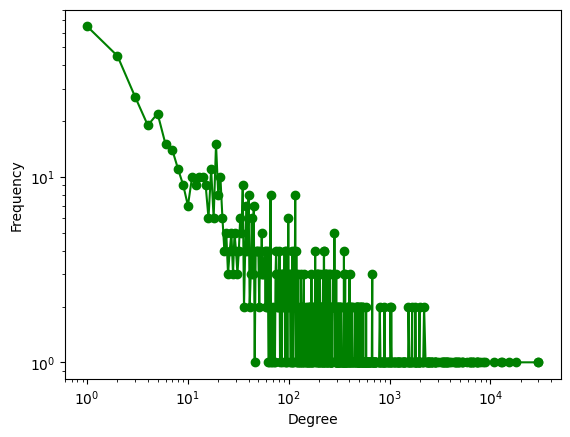

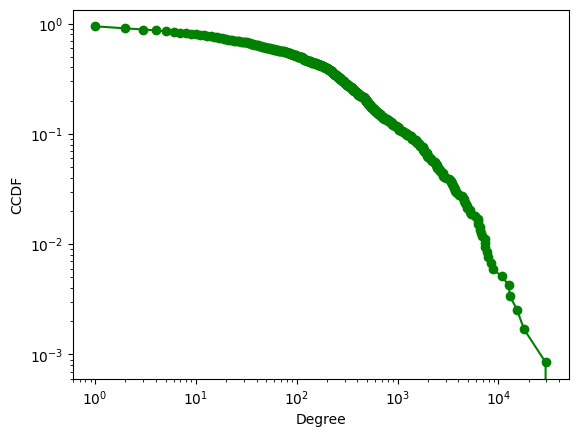

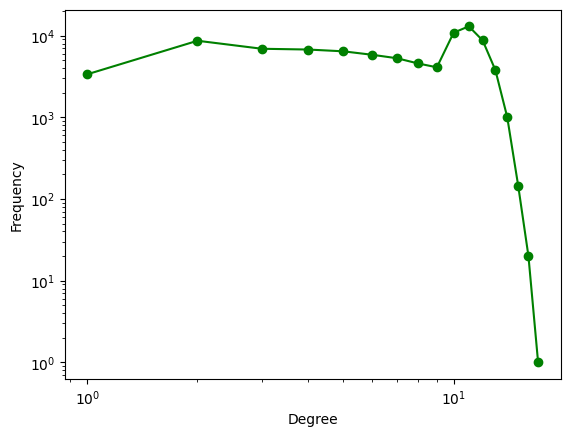

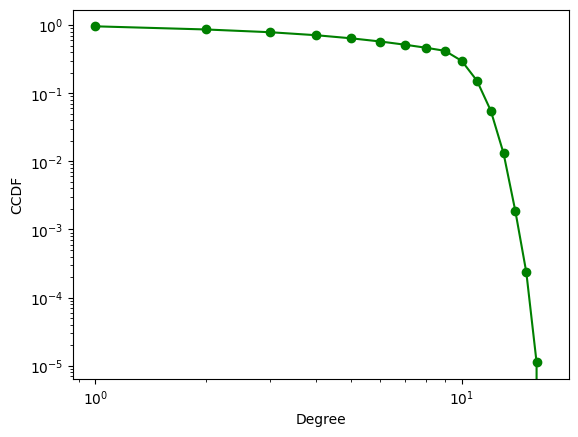

In [ ]:
# Extract the genre and book node ids
genre_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
book_nodes = set(G) - genre_nodes

print(genre_nodes)
print(book_nodes)

# Get the degrees of book and genre nodes
degG, degV = bipartite.degrees(G, book_nodes)
print(degG)
print(degV)

# Get the degree and CCDF seperately for both books and genres

degree_genre_list = [x[1] for x in degG]
degree_freq = {}

for degree in degree_genre_list:
  degree_freq[degree] = degree_freq.get(degree, 0) + 1

dict1 = OrderedDict(sorted(degree_freq.items()))
# plt.yscale('log')
plt.loglog(dict1.keys(), dict1.values(), 'go-')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()
plt.close()

get_ccdf_plot(dict1)

degree_book_list = [x[1] for x in degV]
degree_freq = {}

for degree in degree_book_list:
  degree_freq[degree] = degree_freq.get(degree, 0) + 1

dict1 = OrderedDict(sorted(degree_freq.items()))
# plt.yscale('log')
plt.loglog(dict1.keys(), dict1.values(), 'go-')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()
plt.close()

ccdf = get_ccdf_plot(dict1)


In [ ]:
print(len(degree_genre_list))
print(min(degree_genre_list))
print(max(degree_genre_list))
print(len(degree_book_list))
print(min(degree_book_list))
print(max(degree_book_list))

1178
1
29743
89530
1
17


In [ ]:
degree_cn = nx.degree_centrality(G)
genre_cn = [[genre_id, genre_value] for genre_id, genre_value in degree_cn.items() if genre_id < 0]
genre_cn.sort(key =lambda x : -x[1])

In [ ]:
print([id_to_genre[id] for id, x in genre_cn])

['Fiction', 'Nonfiction', 'Romance', 'Fantasy', 'History', 'Cultural', 'Historical', 'Contemporary', 'Literature', 'Childrens', 'Mystery', 'Historical Fiction', 'European Literature', 'Young Adult', 'Science Fiction', 'Science', 'Reference', 'Religion', 'Paranormal', 'Adult', 'Sequential Art', 'Biography', 'Audiobook', 'Adventure', 'Classics', 'Humor', 'Comics', 'Adult Fiction', 'Philosophy', 'Novels', 'Graphic Novels', 'Short Stories', 'Art', 'Thriller', 'Academic', 'Contemporary Romance', 'Picture Books', 'War', 'Crime', 'Politics', 'Animals', 'LGBT', 'Christian', 'Autobiography', 'Erotica', 'Horror', 'Memoir', 'Psychology', 'Magic', 'Christianity', 'Business', 'Manga', 'Spirituality', 'Historical Romance', 'Paranormal Romance', 'M M Romance', 'Writing', 'Self Help', 'British Literature', 'Mystery Thriller', 'School', 'Category Romance', 'Suspense', 'Food and Drink', 'Urban Fantasy', 'Science Fiction Fantasy', 'Supernatural', 'Poetry', 'Graphic Novels Comics', 'Womens Fiction', 'Chic

In [ ]:
subgraph = nx.k_core(G)

KeyboardInterrupt: ignored

In [ ]:
print(subgraph.size(), subgraph.number_of_nodes())

In [ ]:
print(nx.draw(subgraph))

In [ ]:
print(subgraph.nodes())

with open('/content/drive/MyDrive/com_list.txt') as file:
  com_list = nx.community.louvain_communities(G)
  ans = set()
  for node in subgraph.nodes():
    for com_it in range(len(com_list)):
      if node in com_list[com_it]:
        ans.add(com_it)
print(ans)

In [ ]:
# The degree distribution and CCDF for the whole graph
def get_degree_and_ccdf(G):
  degree_list = [x[1] for x in nx.degree(G)]
  degree_freq = {}

  for degree in degree_list:
    degree_freq[degree] = degree_freq.get(degree, 0) + 1

  dict1 = OrderedDict(sorted(degree_freq.items()))
  # plt.yscale('log')
  # plt.loglog(dict2.keys(), dict2.values(), 'go-')
  # plt.xlabel('Degree')
  # plt.ylabel('Frequency')
  # plt.show()
  # plt.close()
  return dict1
  # ccdf = get_ccdf_plot(dict2)

dict1 = get_degree_and_ccdf(G)
dict2 = get_degree_and_ccdf(R)

plt.loglog(dict1.keys(), dict1.values(), 'go-', color = 'red', label = 'Dataset graph')
plt.loglog(dict2.keys(), dict2.values(), 'go-', color = 'black', label = 'Random graph')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()
plt.close()

ccdf1 = get_ccdf_plot(dict1)
ccdf2 = get_ccdf_plot(dict2)

plt.loglog(dict1.keys(), ccdf1, 'go-', color = 'red', label = 'Dataset graph')
plt.loglog(dict2.keys(), ccdf2, 'go-', color = 'black', label = 'Random graph')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.show()
plt.close()

In [ ]:
# The number of edges and nodes
print(G.size())
print(G.number_of_nodes())
print(len(genre_nodes))
print(len(book_nodes))

In [ ]:
# cluster_list = nx.clustering(G)

In [ ]:
# The density of the graph G
print(nx.density(G))

In [ ]:
print(f'Density for the graph {nx.density(G)}')
print(bipartite.density(G, genre_nodes))
print(bipartite.density(G, book_nodes))

In [ ]:
# Check the number of connected components
obj = nx.connected_components(G)
print(obj)
for it in obj:
  print(it)

In [ ]:
# print(nx.average_clustering(G))
print(G.edges(0))

for it in range(-1, -10, -1):
  print(it, id_to_genre[it])

In [ ]:
print(node_to_data[1423])
print(len(genre_nodes))
print(len(book_nodes))
print(len(genre_nodes) + len(book_nodes))

In [ ]:
# For plotting the distribution of all the books within a genre
def get_genre_distribution(genre_id, G):
  node_degree_list = nx.degree(G, nbunch = nx.all_neighbors(G, genre_id))
  degree_list = [x[1] for x in node_degree_list]
  degree_freq = {}
  for degree in degree_list:
    degree_freq[degree] = degree_freq.get(degree, 0) + 1

  dict1 = OrderedDict(sorted(degree_freq.items()))
  plt.loglog(dict1.keys(), dict1.values(),'go-')
  plt.xlabel('Degree')
  plt.ylabel('Frequency')
  plt.show()
  plt.close()

  get_ccdf_plot(dict1)

In [ ]:
get_genre_distribution(-1, G)

In [ ]:
# Monte Carlo simulation for modularity and community length
# modularity_vals = []
# community_len = []

# def get_communities():
#   for it in range(inner_simulations):
#     com_list = nx.community.louvain_communities(G)
#     modularity = nx.community.modularity(G, com_list)
#     modularity_vals.append(modularity)
#     community_len.append(len(com_list))

# outer_simulations = 10
# inner_simulations = 100

# thread_id = [0] * outer_simulations

# for it in range(outer_simulations):
#   thread_id[it] = threading.Thread(target = get_communities, )
#   thread_id[it].start()

# for it in range(outer_simulations):
#   thread_id[it].join()
com_list = nx.community.louvain_communities(R)


In [ ]:
# count, bins, patches = plt.hist(modularity_vals,bins=8)
# mu,sigma = np.mean(modularity_vals),np.std(modularity_vals)
# y = norm.pdf(bins,mu,sigma)
# l = plt.plot(bins,y*len(modularity_vals)*(bins[2]-bins[1]),'b--',linewidth = 3)
# plt.style.use('ggplot')
# plt.xlabel("Modularity")
# plt.ylabel("Frequency")
# plt.show()


# plt.hist(community_len,bins=5)
# plt.xlabel("Coummnity Length")
# plt.ylabel("Frequency")
# plt.style.use('ggplot')
# plt.show()

In [ ]:
modularity = nx.community.modularity(R, com_list)

In [ ]:
print(modularity)
print(len(com_list))
print(com_list)

0.12153481327398881
39
[{24576, 57353, 16395, 57366, 8214, 65560, 49179, 8225, 16423, 81964, 46, 32815, 73781, 41013, 49220, 24650, 8276, 8279, 88, 73819, 8284, 73821, 49246, 49244, 94, 73820, 24676, 101, 82025, 57451, 24684, 57454, 32878, 73847, 82041, 123, 24704, 73858, 24707, 24708, 57477, 82054, 49285, 49289, 41107, 16531, 65688, 73881, 82075, 24735, 32932, 16551, 172, 73909, 16567, 49336, 57530, 187, 16572, 73919, 32961, 8387, 32967, 49352, 32971, 82128, 32979, 73943, 24795, 65756, 221, 32990, 82142, 223, 24797, 8423, 82156, 41197, 41200, 24816, 24818, 24819, 24820, 16630, 24826, 49416, 65804, 49423, 41233, 57621, 24862, 65827, 57637, 33063, 41261, 302, 24885, 74040, 24889, 314, 57659, 319, 65861, 74055, 41296, 33107, 74069, 33111, 74071, 41310, 8543, 24930, 33123, 16740, 65895, 49516, 8557, 57709, 82291, 82292, 49530, 41344, 24966, 49546, 8594, 82322, 41364, 16790, 41367, 16794, 57766, 74151, 41388, 82352, 57778, 82355, 33205, 25013, 82361, 74172, 41408, 8640, 74182, 8652, 25042,

In [ ]:
# Getting the length of each community and the number of genres that lie within that community
avg = 0
for com in com_list:
  genres = 0
  for node in com:
    if node < 0:
      genres += 1
  avg += genres / len(com) # Average num of genres in a community
  print(len(com), genres)
print(avg / len(com_list), 1178/90708)

2589 33
1263 16
3166 40
2587 33
3076 40
477 6
1148 15
1039 13
3891 50
3262 42
3013 39
3515 45
2496 32
2477 32
1210 15
1786 23
2481 34
930 12
1305 17
2476 34
2483 32
1677 22
2532 35
2481 32
472 6
1189 15
1333 17
2643 36
3327 43
2322 30
2945 38
2576 35
2784 36
2246 29
3924 50
2031 26
2885 37
3243 44
3428 44
0.012953737113364595 0.01298672663932619


Average Common Neighbours

In [ ]:
# with open('/content/drive/MyDrive/com_list.txt') as file:
#   com_list = ast.literal_eval(file.read())
for com in com_list:
  genres = []
  books = 0
  for node in com:
    if node < 0:
      genres.append(node)
    else:
      books += 1
  average_com_neighbors = 0

  for it1 in range(len(genres)):
    for it2 in range(it1 + 1, len(genres)):
      average_com_neighbors += len(list(nx.common_neighbors(G, genres[it1], genres[it2])))
  average_com_neighbors /= ((len(genres) * (len(genres) - 1)) / 2)
  normalised_com_neighbors = average_com_neighbors / books
  print(len(com), round(average_com_neighbors, 2), round(normalised_com_neighbors, 4))

In [ ]:
genre_nodes_list = list(genre_nodes)

for it1 in range(len(genre_nodes_list)):
  for it2 in range(it1 + 1, len(genre_nodes_list)):
    average_com_neighbors += len(list(nx.common_neighbors(G, genre_nodes_list[it1], genre_nodes_list[it2])))
average_com_neighbors /= (len(genre_nodes_list) * (len(genre_nodes_list) - 1))
normalised_com_neighbors = average_com_neighbors / len(book_nodes)

In [ ]:
print(average_com_neighbors, normalised_com_neighbors)

In [ ]:
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

# For getting the distribution of a single community with a given color
def get_community_distribution(G, com, color, idx):
  node_degree_list = nx.degree(G, nbunch = com)
  degree_list = [x[1] for x in node_degree_list]
  degree_freq = {}
  for degree in degree_list:
    degree_freq[degree] = degree_freq.get(degree, 0) + 1

  dict1 = OrderedDict(sorted(degree_freq.items()))
  total_degrees = sum(dict1.values())
  cdf = [sum(list(dict1.values())[:i+1]) / total_degrees for i in range(len(dict1))]

  # Calculate the CCDF
  ccdf = [1 - p for p in cdf]

  plt.loglog(dict1.keys(), ccdf, color = color, label = f'Community {idx}')
  plt.xlabel('Degree')
  plt.ylabel('CCDF')

<ipython-input-21-0b2a53f7fd60>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, n)


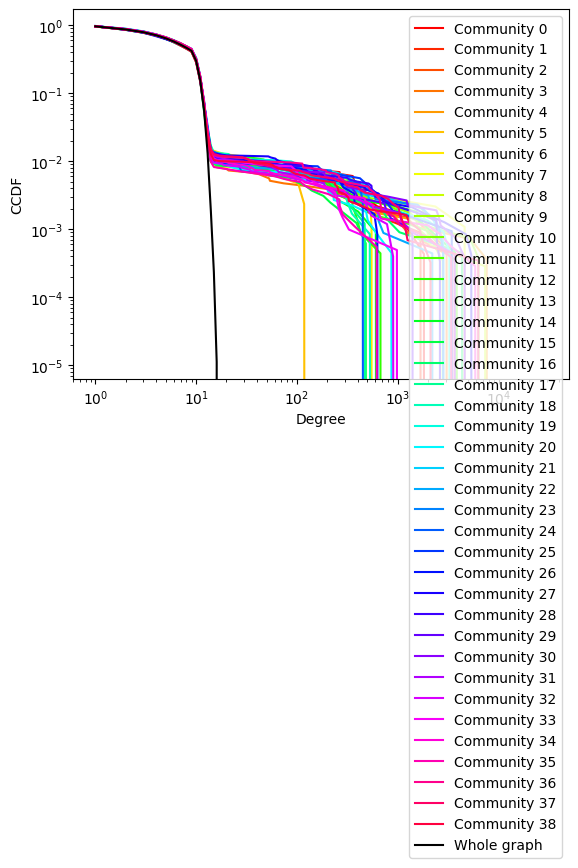

In [ ]:
cmap = get_cmap(len(com_list) + 1)
for it in range(len(com_list)):
  get_community_distribution(G, com_list[it], cmap(it), it)

plt.loglog(dict1.keys(), ccdf, color = 'black', label='Whole graph')
plt.legend()
# plt.legend([f'Community {it}' for it in range(len(com_list))].append('Whole graph'))
plt.show()
plt.close()

In [ ]:
# centrality measures starts here
ls = nx.degree_centrality(G)

# ls = nx.betweenness_centrality_subset(G, [-1], range(-1, -len(genre_to_nodes), -1))

# ls = nx.eigenvector_centrality(G)
# ls = bipartite.betweenness_centrality(G, [0])

In [ ]:
# Pagerank centrality
# pagerank_list = nx.laplacian_centrality(G)

In [ ]:
# dict1 = OrderedDict(sorted(pagerank_list.items()))
# # Plot the CCDF

# genre_pagerank = OrderedDict()
# book_pagerank = {}

# for key in dict1.keys():
#   if key < 0:
#     genre_pagerank[key] = dict1[key]
#   else:
#     book_pagerank[key] = dict1[key]


# degree_freq = {}
# for degree in genre_pagerank.values():
#   degree_freq[degree] = degree_freq.get(degree, 0) + 1

# dict1 = OrderedDict(sorted(degree_freq.items()))
# total_degrees = sum(dict1.values())
# cdf = [sum(list(dict1.values())[:i+1]) / total_degrees for i in range(len(dict1))]

# # Calculate the CCDF
# ccdf = [1 - p for p in cdf]

# plt.loglog(genre_pagerank.values(), ccdf,, label = f'Community {idx}')
# plt.xlabel('Degree')
# plt.ylabel('CCDF')

# plt.loglog(genre_pagerank.keys(), genre_pagerank.values())
# plt.xlabel('node')
# plt.ylabel('rank')
# plt.show()
# plt.close()
# get_ccdf_plot(genre_pagerank)
# plt.loglog(book_pagerank.keys(), book_pagerank.values())
# plt.xlabel('node')
# plt.ylabel('rank')
# plt.show()
# plt.close()
# get_ccdf_plot(book_pagerank)

In [ ]:
print(nx.community.modularity(G, [book_nodes, genre_nodes]))